In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Datas

In [4]:
market_ticker = '^GSPC' #^GSPC
st = 'f'

stime='2016-01-01'
ftime=None

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval='1d'):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))



df.head(3)

,^GSPC
Date,
2016-01-04 00:00:00-05:00,2012.660034
2016-01-05 00:00:00-05:00,2016.709961
2016-01-06 00:00:00-05:00,1990.260010


In [6]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = df.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(df.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = df.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = np.insert(gf_vv, 0, 0)
    gf_vv = np.delete(gf_vv, -1)
    return gf_vv

df[f"% update {market_ticker}"] = add_percent_update(market_ticker)
# gf[f"% update {st}"] = add_percent_update(st)

df.head(3)

,^GSPC,% update ^GSPC
Date,,
2016-01-04 00:00:00-05:00,2012.660034,0.000000
2016-01-05 00:00:00-05:00,2016.709961,0.201223
2016-01-06 00:00:00-05:00,1990.260010,-1.311540


In [7]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    if df.iloc[i, 1] > 0:
        r[i] = 'Plus'
    else:
        r[i] = 'Minus'
        
df['Side'] = r        

Signal module

In [8]:
''' easy signal way'''

# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] > 0:
#             r[i+1] = 'Long'
#         else:
#             r[i+1] = 'Short'
#     except:
#         pass
        
# df['Signal'] = r



' easy signal way'

In [9]:
''' more or less '''


# ''' получаем точки разворота '''
# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] < 0 and df.iloc[i-1, 1] < 1:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 1] > 0 and df.iloc[i-1, 1] > -1:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass
    
# df['Signal'] = r

' more or less '

MA tests

In [10]:
# ''' MA tests 
# if Fast more or less than slow
# True     656
# False    599
# '''


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=12, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=26, adjust=False).mean()



# for i in range(len(r)):
#     try:
#         if df.iloc[i, 5] < df.iloc[i, 4]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 5] > df.iloc[i, 4]:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass

# df['Signal'] = r

In [11]:
''' MA tests 
if slow or fast up or down
SLOW (26)
    True     657
    False    598
    
FAST (12)
    True     644
    False    611

if FAST and FAST-1 more or less then price and price-1
MA 50
True     630
False    574

MA 150
True     594
False    510

MA 35
True     630
False    574
13
    
if price more or less MA
MA 50    
True     629
False    575

MA 40    
True     637
False    577

MA 35      !!!
True     641
False    578
19


MA 30
True     642
False    582

F35 S100
True     618
False    536

F35 S80
True     617
False    557
-19

F35 S130 more/less price  !!!
True     607
False    517
25

F35 S150 more/less price  !!!
True     607
False    517
20

F35 S130 more/less price + fast with price and price-1!!!
True     607
False    517
31

F35 S130 more/less price + fast and slow with price and price-1!!!
True     607
False    517
34.6

F35 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
True     607
False    517
35.9

F20 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
True     607
False    517
36.7
'''
# fma = 20
# mma = 50
# sma = 130


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=fma, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()
# # df['ma_middle'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()


# for i in range(len(r)):
#     try:
   
    #     if i < sma:
    #         r[i] = None
    #     elif df.iloc[i, 0] > df.iloc[i, 4] \
    #         and df.iloc[i-1, 0] > df.iloc[i-1, 4] \
    #         and df.iloc[i-2, 0] > df.iloc[i-2, 4]\
    #         and df.iloc[i, 0] > df.iloc[i, 5] \
    #         and df.iloc[i-1, 0] > df.iloc[i-1, 5]:
    #         r[i+1] = 'Long'
    #     elif df.iloc[i, 0] < df.iloc[i, 4] \
    #         and df.iloc[i-1, 0] < df.iloc[i-1, 4] \
    #         and df.iloc[i-2, 0] < df.iloc[i-2, 4] \
    #         and df.iloc[i, 0] < df.iloc[i, 5] \
    #         and df.iloc[i-1, 0] < df.iloc[i-1, 5]:
    #         r[i+1] = 'Short'
    #     else:
    #         pass
    # except:
    #     pass

# df['Signal'] = r
# df

' MA tests \nif slow or fast up or down\nSLOW (26)\n    True     657\n    False    598\n    \nFAST (12)\n    True     644\n    False    611\n\nif FAST and FAST-1 more or less then price and price-1\nMA 50\nTrue     630\nFalse    574\n\nMA 150\nTrue     594\nFalse    510\n\nMA 35\nTrue     630\nFalse    574\n13\n    \nif price more or less MA\nMA 50    \nTrue     629\nFalse    575\n\nMA 40    \nTrue     637\nFalse    577\n\nMA 35      !!!\nTrue     641\nFalse    578\n19\n\n\nMA 30\nTrue     642\nFalse    582\n\nF35 S100\nTrue     618\nFalse    536\n\nF35 S80\nTrue     617\nFalse    557\n-19\n\nF35 S130 more/less price  !!!\nTrue     607\nFalse    517\n25\n\nF35 S150 more/less price  !!!\nTrue     607\nFalse    517\n20\n\nF35 S130 more/less price + fast with price and price-1!!!\nTrue     607\nFalse    517\n31\n\nF35 S130 more/less price + fast and slow with price and price-1!!!\nTrue     607\nFalse    517\n34.6\n\nF35 S130 more/less price + fast with price 0, -1, -2 and slow with price 

MACD test

In [12]:
''' MACD tests 


if macd_signal more or less 0 
True     657
False    598

if macd more or less 0 
True     656
False    599
12

if macd_signal more or less then previous macd
False    636
True     619

if macd more or less then previous macd
True     634
False    621

if macd and macd_signal more or less then previous 
False    636
True     619

if macd more or less macd_signal
True     637
False    618

if macd more or less 0, and macd_signal conversly
True   638
False  617


if macd more or less -1,-2
False    621
True     607
30.5

if macd_signal more or less -1,-2
False    625
True     603
19.9

if macd more or less 0 and macd_signal-1 conversly + macd_signal conversly macd
True     602
False    523
43.57497817317594

if masi 3/-3
60

if masi 1/-1
30

if masi 3/-4
69

if masi 3/-3.5
75

if masi percent 10/-15
71.61258606208699

if masi percent 15/-15
105


if masi percent 20/-15  !!!!
112.8

if masi with macd_signal percent 20/-15  !!!!
115.7


macd_signal and masi intersaction 20/-15  and side 0.9
120.3

'''


fma = 12
sma = 26


r = list(df[f'% update {market_ticker}'].values)
df['Signal'] = r

df['ma_fast'] = df[market_ticker].ewm(span=fma, adjust=False).mean()
df['ma_slow'] = df[market_ticker].ewm(span=sma, adjust=False).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal_macd'] = df['macd'].ewm(span=9, adjust=False).mean()
df['masi'] = df['macd'] - df['signal_macd']


p_per = 20
m_per = -15

beta = 1
beta2 = beta/beta

for i in range(len(r)):
    try:
        ''' macd middle line '''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 6] > 0 and df.iloc[i-1, 6] < 0 and df.iloc[i, 7] > 0:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 6] < 0 and df.iloc[i-1, 6] > 0 and df.iloc[i, 7] < 0:
#             r[i+1] = 'Short'
#         else:
#             pass


        ''' macd and masi intersaction'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Short'
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Short'
        # else:
        #     pass
        
#         ''' macd_signal and masi intersaction'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Short'
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Short'
#         else:
#             pass
        
        
        # ''' macd_signal and masi intersaction and side'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # elif df.iloc[i, 8] < 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # else:
        #     pass
        

        ''' macd_signal and masi intersaction and side'''
        if i < sma:
            r[i] = None
        elif df.iloc[i, 8] > 0:
            if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
                r[i+1] = 'Short'
            elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
                r[i+1] = 'Short'
            else:
                pass
        elif df.iloc[i, 8] < 0:
            if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
                r[i+1] = 'Short'
            elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
                r[i+1] = 'Short'
            else:
                pass
        else:
            pass
        
        
    except:
        pass

df['Signal'] = r
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-21 00:00:00-05:00,3878.439941,1.486799,Plus,1.486799,3909.569520,3922.981272,-13.411752,10.009465,-23.421217
2022-12-22 00:00:00-05:00,3822.389893,-1.445170,Minus,-1.44517,3896.157270,3915.530059,-19.372789,4.133014,-23.505803
2022-12-23 00:00:00-05:00,3844.820068,0.586810,Plus,0.58681,3888.259239,3910.292282,-22.033043,-1.100197,-20.932846


Закрытие пробелов 

In [13]:
''' заполняем пробелы '''
r = list(df['Signal'].values)


for i in range(len(r)):
    if df.iloc[i, 3] == None:
        pass
    elif type(df.iloc[i, 3]) == str:
        if df.iloc[i, 3] == 'Long' or df.iloc[i, 3] == 'Short':
            pass 
        else:
            df.iloc[i, 3] = df.iloc[i-1, 3]
    else:
        df.iloc[i, 3] = df.iloc[i-1, 3]
        

df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-21 00:00:00-05:00,3878.439941,1.486799,Plus,Short,3909.569520,3922.981272,-13.411752,10.009465,-23.421217
2022-12-22 00:00:00-05:00,3822.389893,-1.445170,Minus,Short,3896.157270,3915.530059,-19.372789,4.133014,-23.505803
2022-12-23 00:00:00-05:00,3844.820068,0.586810,Plus,Short,3888.259239,3910.292282,-22.033043,-1.100197,-20.932846


Result module

In [14]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Short':
            r[i] = True
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Long':    
            r[i] = True
        elif df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Long':    
            r[i] = False  
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Short':    
            r[i] = False 
        else:
            r[i] = None
    except:
        pass
    
df['Result'] = r
df['Result'].value_counts()
# df.tail(300)
# df.head(300)

True     895
False    832
Name: Result, dtype: int64

Sum

In [15]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = (df.iloc[i, 1] * -1)
        elif df.iloc[i, 3] == 'Long':
            r[i] = df.iloc[i, 1]
        else:
            r[i] = 0
    except:
        pass
    
df['Sum'] = r
df['Sum'].sum()
# df.tail(100)

120.35707052992841

In [19]:
df1 = df.reset_index(drop=True)

In [21]:
df1

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi,Result,Sum
0,2012.660034,0.000000,Minus,None,2012.660034,2012.660034,0.000000,0.000000,0.000000,None,0.000000
1,2016.709961,0.201223,Plus,None,2013.283100,2012.960029,0.323071,0.064614,0.258457,None,0.000000
2,1990.260010,-1.311540,Minus,None,2009.741086,2011.278546,-1.537460,-0.255801,-1.281659,None,0.000000
3,1943.089966,-2.370044,Minus,None,1999.487067,2006.227540,-6.740472,-1.552735,-5.187737,None,0.000000
4,1922.030029,-1.083837,Minus,None,1987.570600,1999.990687,-12.420087,-3.726205,-8.693882,None,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1753,3817.659912,-0.900752,Minus,Short,3932.249321,3934.938535,-2.689214,22.659746,-25.348960,True,0.900752
1754,3821.620117,0.103734,Plus,Short,3915.229443,3926.544579,-11.315135,15.864769,-27.179904,False,-0.103734
1755,3878.439941,1.486799,Plus,Short,3909.569520,3922.981272,-13.411752,10.009465,-23.421217,False,-1.486799
1756,3822.389893,-1.445170,Minus,Short,3896.157270,3915.530059,-19.372789,4.133014,-23.505803,True,1.445170


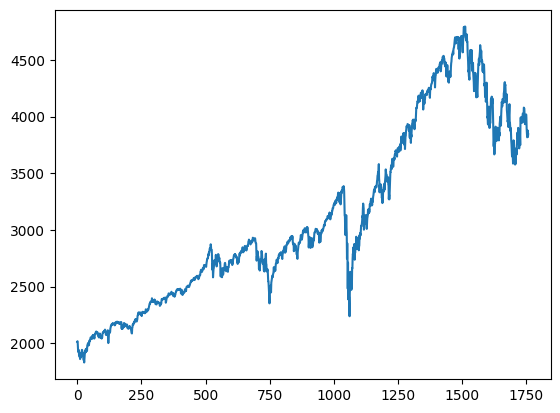

In [30]:
plt.plot(df1.index, df1[f'{market_ticker}'])

<BarContainer object of 1758 artists>

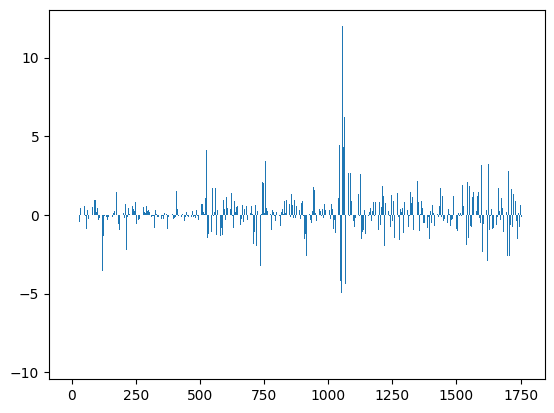

In [28]:
plt.bar(df1.index, df1['Sum'])